In [1]:
!git clone https://github.com/afozbek/Track_Data

Cloning into 'Track_Data'...
remote: Enumerating objects: 12850, done.
remote: Counting objects: 100% (12850/12850), done.
remote: Compressing objects: 100% (12850/12850), done.
remote: Total 12850 (delta 0), reused 12850 (delta 0), pack-reused 0
Receiving objects: 100% (12850/12850), 156.69 MiB | 36.93 MiB/s, done.
Checking out files: 100% (13036/13036), done.


In [2]:
!ls Track_Data

driving_log.csv  IMG


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random

In [10]:
datadir = 'Track_Data'
columns = ['center', 'left', 'right',
           'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'),
             names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\center_2019_01_29_18_32_35_352.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\left_2019_01_29_18_32_35_352.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\right_2019_01_29_18_32_35_352.jpg,0.0,0.0,0.0,0.000084
1,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\center_2019_01_29_18_32_35_454.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\left_2019_01_29_18_32_35_454.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\right_2019_01_29_18_32_35_454.jpg,0.0,0.0,0.0,0.000080
2,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\center_2019_01_29_18_32_35_560.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\left_2019_01_29_18_32_35_560.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\right_2019_01_29_18_32_35_560.jpg,0.0,0.0,0.0,0.000079
3,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\center_2019_01_29_18_32_35_664.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\left_2019_01_29_18_32_35_664.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\right_2019_01_29_18_32_35_664.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\center_2019_01_29_18_32_35_785.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\left_2019_01_29_18_32_35_785.jpg,C:\Users\Furkan-Ozbek\Desktop\DATA\IMG\right_2019_01_29_18_32_35_785.jpg,0.0,0.0,0.0,0.000080


In [12]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_01_29_18_32_35_352.jpg,left_2019_01_29_18_32_35_352.jpg,right_2019_01_29_18_32_35_352.jpg,0.0,0.0,0.0,0.000084
1,center_2019_01_29_18_32_35_454.jpg,left_2019_01_29_18_32_35_454.jpg,right_2019_01_29_18_32_35_454.jpg,0.0,0.0,0.0,0.000080
2,center_2019_01_29_18_32_35_560.jpg,left_2019_01_29_18_32_35_560.jpg,right_2019_01_29_18_32_35_560.jpg,0.0,0.0,0.0,0.000079
3,center_2019_01_29_18_32_35_664.jpg,left_2019_01_29_18_32_35_664.jpg,right_2019_01_29_18_32_35_664.jpg,0.0,0.0,0.0,0.000078
4,center_2019_01_29_18_32_35_785.jpg,left_2019_01_29_18_32_35_785.jpg,right_2019_01_29_18_32_35_785.jpg,0.0,0.0,0.0,0.000080


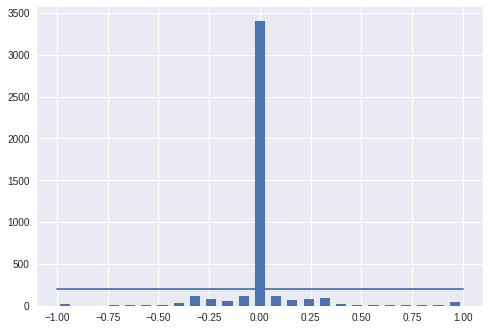

In [15]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),
        (samples_per_bin, samples_per_bin))